In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

data = pd.read_csv("HistoryViewsCities.csv",index_col=0)

data['day'] = pd.to_datetime(data['day'], format='%Y%m%d')

display(data.head())

,day,London,Paris,Rome,Florence,Milan,Venice,Edinburgh,Glasgow,New_York_City,...,Riga,Shiraz,Kabul,Avignon,Marseille,Havana,Jakarta,Sydney,Melbourne,Detroit
0,2015-07-01,14117,8974,4832,3285,3069,5028,3009,2793,14290,...,1387,580,1000,861,1862,2087,3059,3653,3670,5160
1,2015-07-02,13871,9329,4824,3120,3077,4574,2990,2780,14127,...,1380,599,1079,887,1926,1661,3291,3552,3467,5481
2,2015-07-03,12061,8274,4453,2970,2872,4745,2750,2461,13520,...,1378,646,973,816,1679,1383,2573,3276,3303,5093
3,2015-07-04,11927,7351,4347,3064,2821,4417,2596,2453,13651,...,1201,558,1183,1086,1657,1290,2633,3015,3158,5063
4,2015-07-05,12632,8195,4698,3110,2972,5046,2927,2633,14636,...,1219,594,1163,987,2011,1318,2540,3330,3406,5279


In [2]:
cities = pd.DataFrame(data.drop(columns = ['day']).mean(), columns = ['Mean_Daily_Views'])
cities['Standard_Deviation'] = data.drop(columns = ['day']).std()
cities['Coef_Var'] = cities['Standard_Deviation']/cities['Mean_Daily_Views']
cities['Median'] = data.drop(columns = ['day']).median()
display(cities.head())

,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median
London,12839.788721,2919.749790,0.227399,12484.0
Paris,7681.922559,7423.516764,0.966362,7118.0
Rome,5309.776094,771.229493,0.145247,5255.0
Florence,3004.405724,512.299897,0.170516,2961.0
Milan,2993.249158,381.029873,0.127296,2972.5


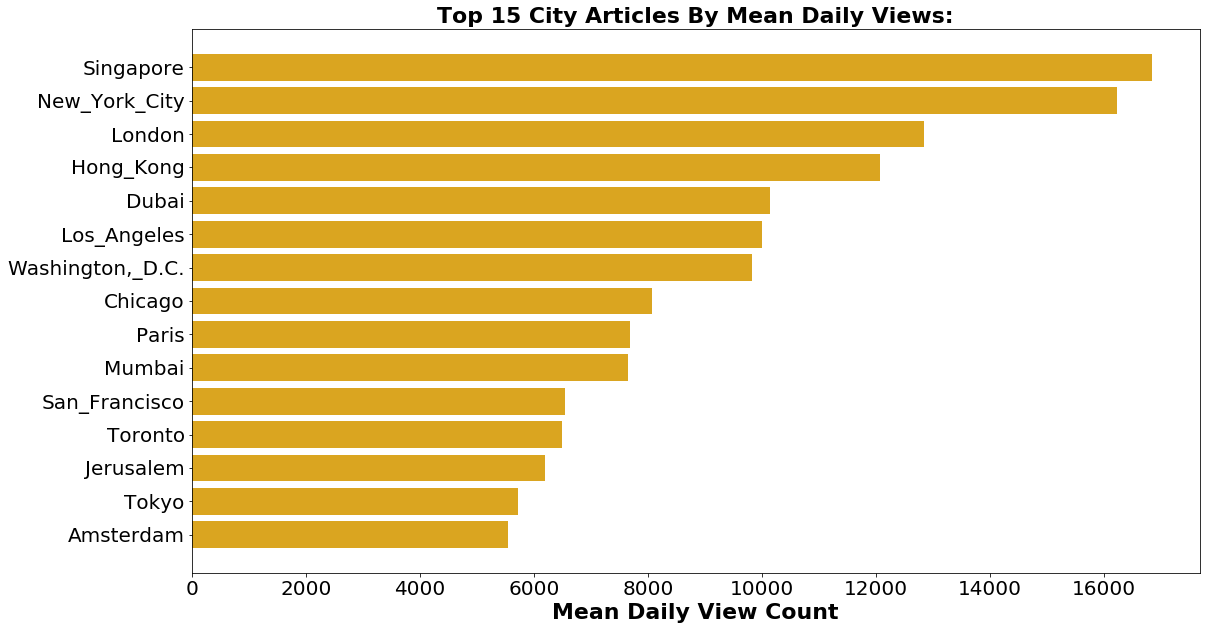

In [3]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

top_means = cities.sort_values(by=['Mean_Daily_Views'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_means.index.values, top_means['Mean_Daily_Views'], color='goldenrod')
plt.title('Top 15 City Articles By Mean Daily Views:', fontdict=font)
plt.xlabel('Mean Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

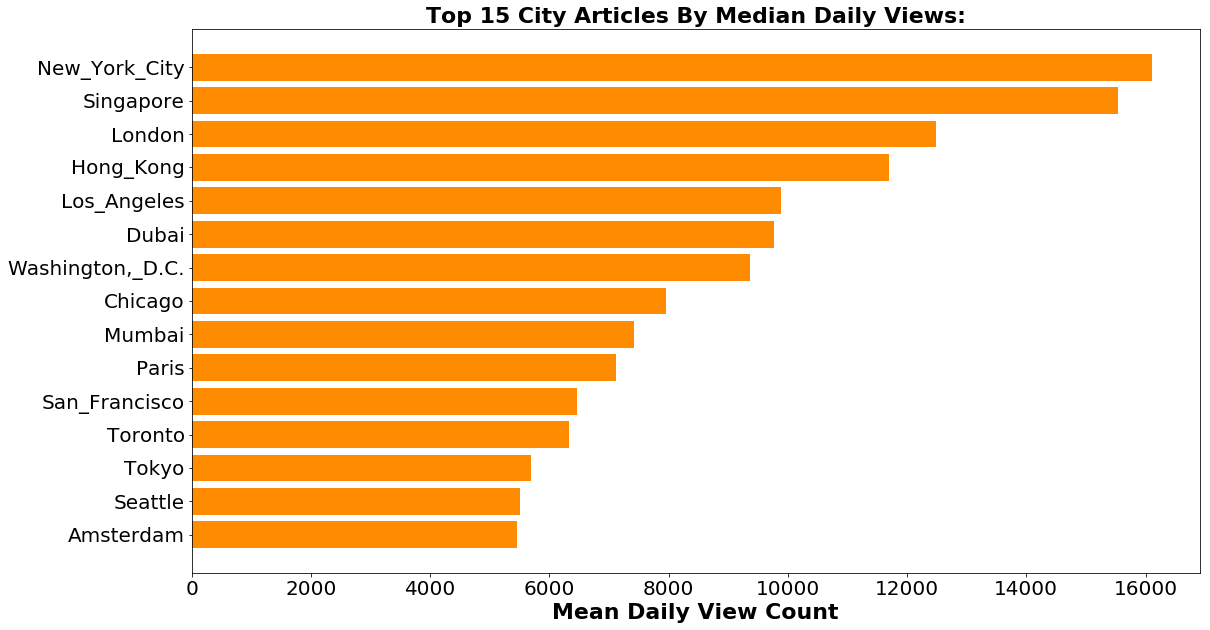

In [4]:
top_medians = cities.sort_values(by=['Median'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_medians.index.values, top_medians['Median'], color='darkorange')
plt.title('Top 15 City Articles By Median Daily Views:', fontdict=font)
plt.xlabel('Mean Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

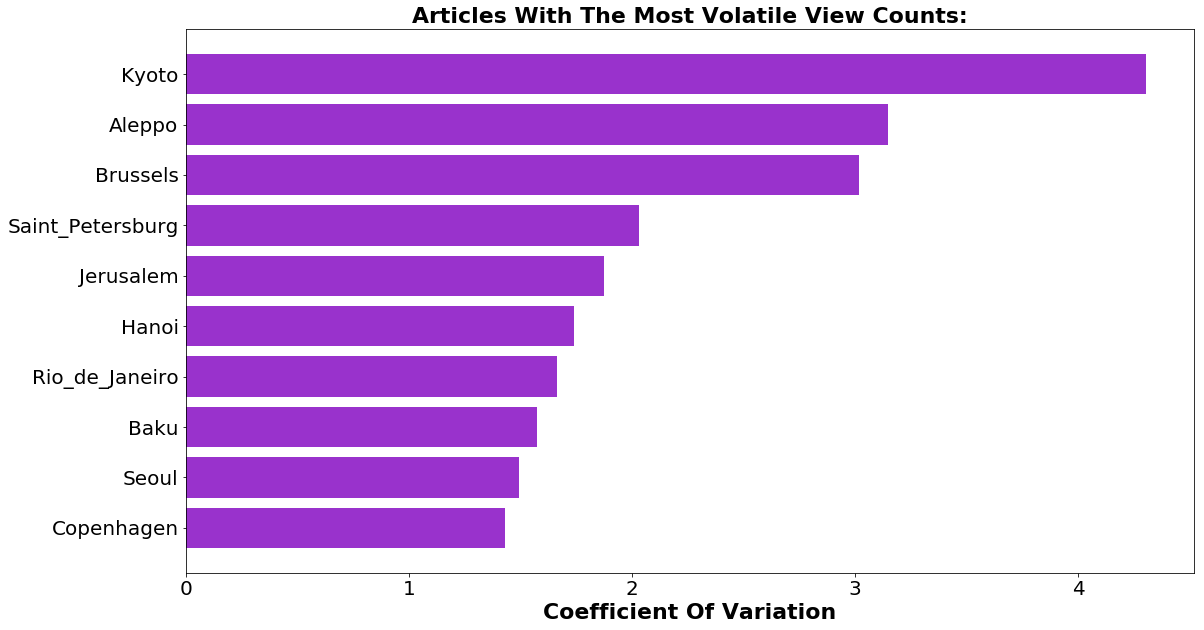

In [5]:
top_cvars = cities.sort_values(by = ['Coef_Var'], ascending=False).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_cvars.index.values, top_cvars['Coef_Var'], color='darkorchid')
plt.title('Articles With The Most Volatile View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

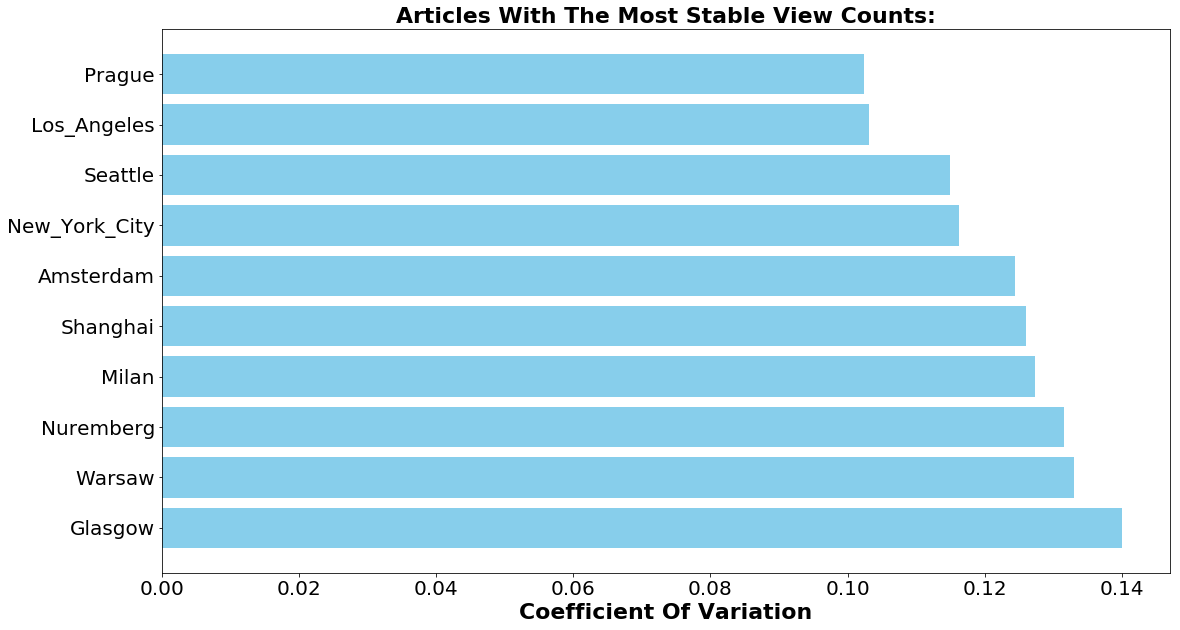

In [6]:
bottom_cvars = cities.sort_values(by = ['Coef_Var'], ascending=True).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(bottom_cvars.index.values, bottom_cvars['Coef_Var'], color='skyblue')
plt.title('Articles With The Most Stable View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

In [7]:
def plot_daily(article):
    years = YearLocator()  
    months = MonthLocator()  
    monthsFmt = DateFormatter('%m')

    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}

    fig, ax = plt.subplots(figsize=(20,5))

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt)

    ax.xaxis.set_tick_params(labelsize=20, pad=20)
    ax.xaxis.set_tick_params(which='minor',labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)

    plt.plot(data['day'], data[article])
    plt.title(f'Daily View Count: {article}', fontdict=font)
    plt.ylabel('Daily View Count',fontdict=font)
    plt.gcf().subplots_adjust(bottom=0.15)
    #plt.savefig(f'{article}_Daily_Line.jpeg')
    plt.show()
    
    pass

In [8]:
def bar_top5(article):
    top_days = (data[['day', article]]).sort_values(ascending=False, by=article).head()
    top_days.loc[-1] = ['Mean', data[article].mean()]

    fig, ax = plt.subplots(figsize=(20,5))
    plt.bar(top_days['day'].astype(str).str.slice(0,10), top_days[article], color='firebrick')
    plt.title(f'Top 5 Days: {article}', fontdict=font)
    plt.ylabel('Daily Viewcount',fontdict=font)

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=15)
    
    #plt.savefig(f'{article}_Top5.jpeg')

    plt.show()

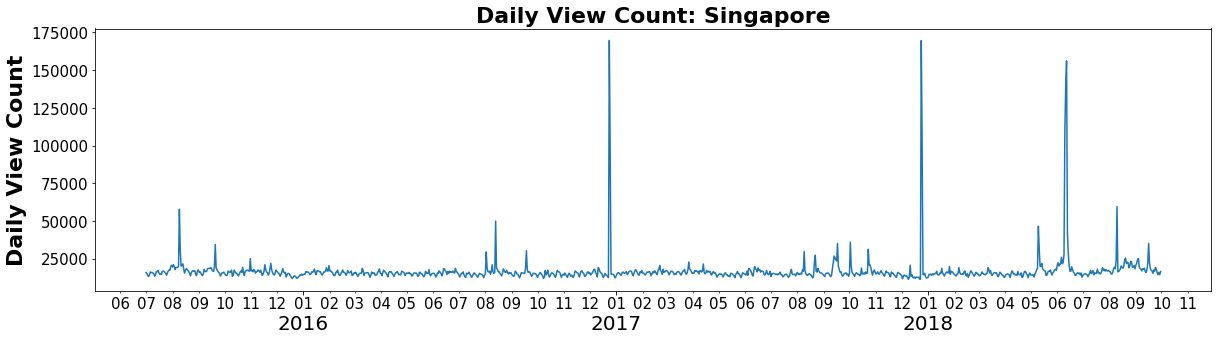

In [9]:
article = 'Singapore'

plot_daily(article)

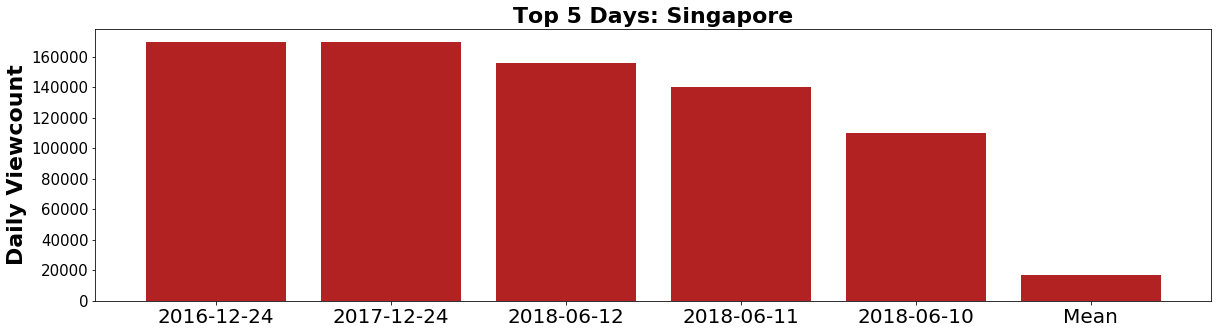

In [10]:
bar_top5(article)

### Christmas Eve light-ups and parties. Singapore Summit between Donald Trump and Kim Jong-Un occurred from June 10, when the leaders arrived, to June 12, when they met.

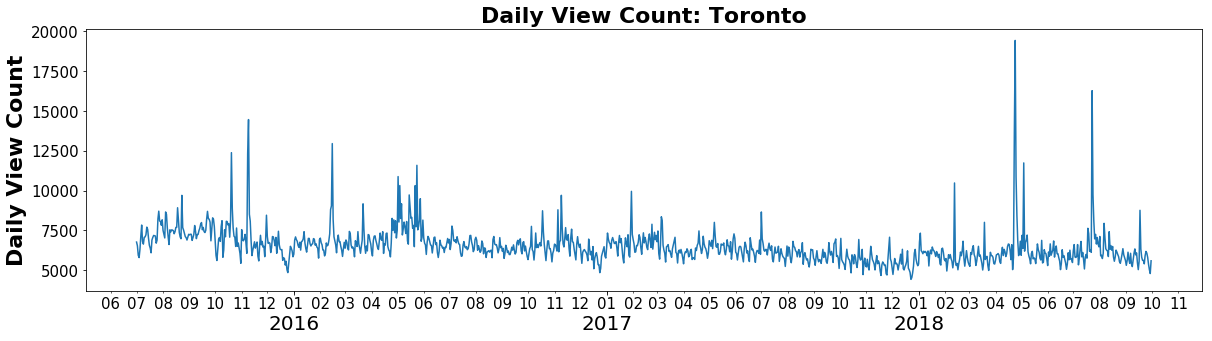

In [11]:
article = 'Toronto'

plot_daily(article)

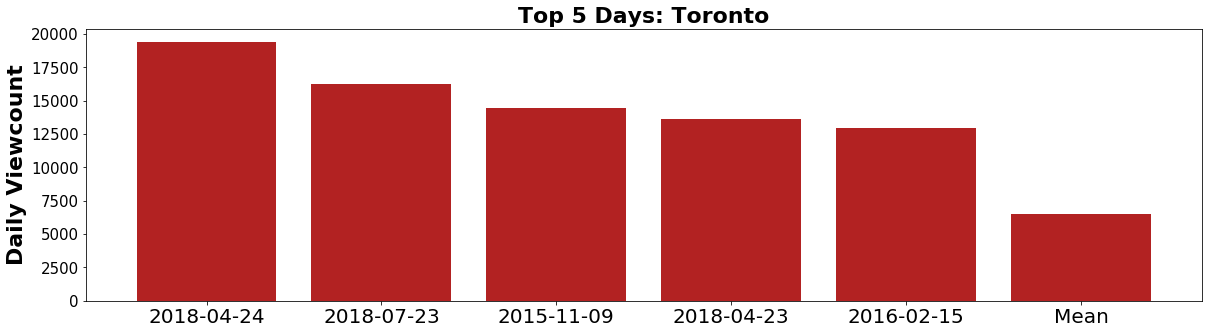

In [12]:
bar_top5(article)

### Van attack April 23, 2018. Danforth shooter July 22, 2018. On November 9, 2015, there were developments in two Toronto-based child murder cases (Melonie Biddersingh and Katelynn Sampson). The 2016 NBA All-Star Game took placed in Toronto, on February 14, 2016.

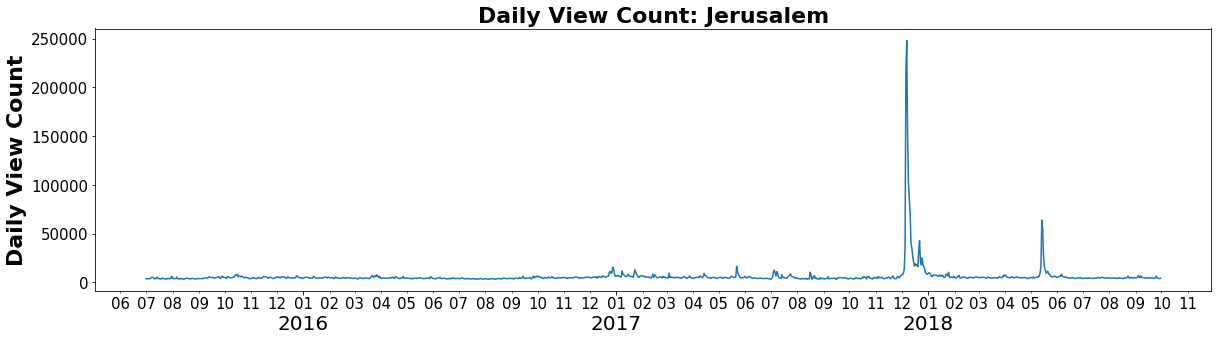

In [13]:
article = 'Jerusalem'

plot_daily(article)

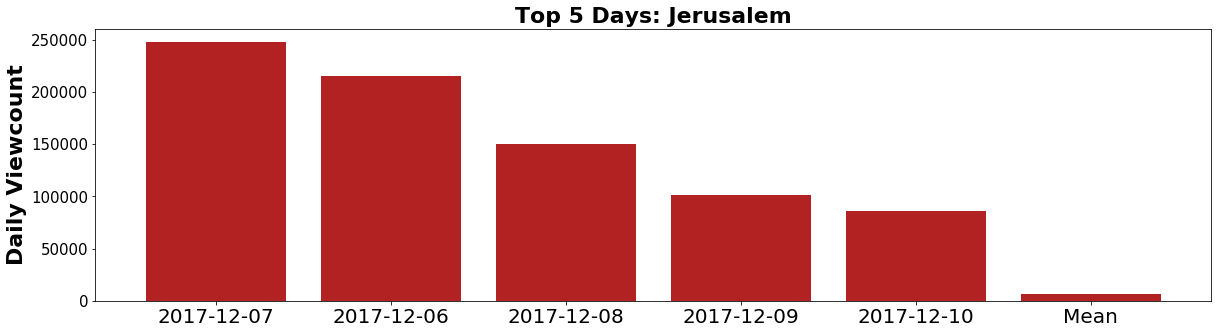

In [14]:
bar_top5(article)

### Trump moving embassy December 2017.

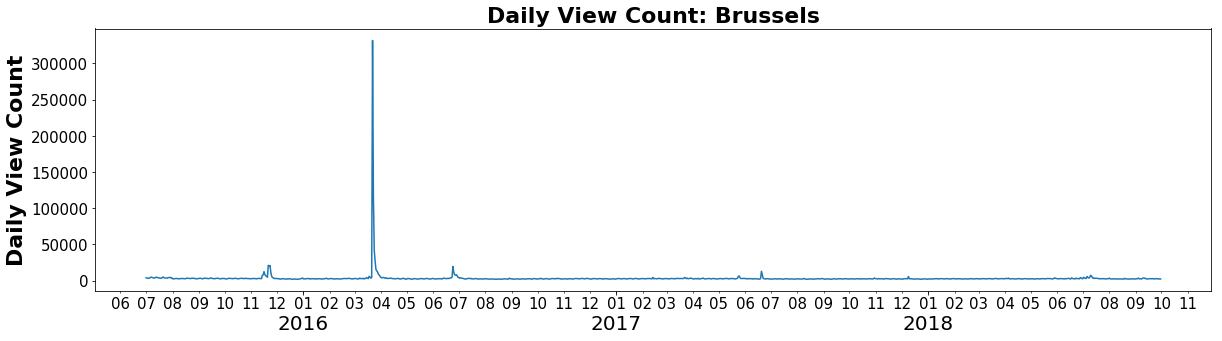

In [15]:
article = 'Brussels'

plot_daily(article)

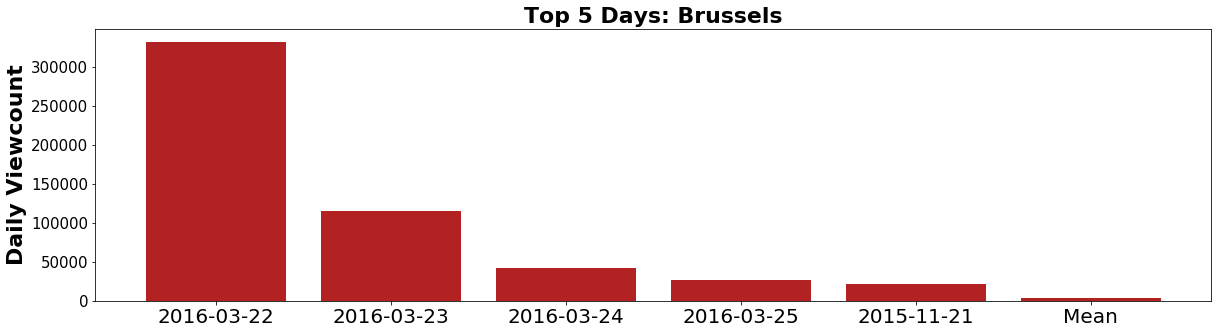

In [16]:
bar_top5(article)

### March 22, 2016 was the date of the bombing of Brussels airport and train station by ISIS militants.

In [17]:
data_smooth = data.copy()

for column in data_smooth.columns[1:]:
    sd = data_smooth[column].std()
    avg = data_smooth[column].mean()
    
    mask = data_smooth[column] > (avg + (sd*2))
    
    data_smooth.loc[mask, column] = (avg + (sd*2))

In [18]:
from sklearn.preprocessing import StandardScaler
data_scale = data_smooth.drop(columns = ['day'])

scaler = StandardScaler()
scaler.fit(data_scale)
data_scale = pd.DataFrame(scaler.transform(data_scale), columns = [data_scale.columns])
data_scale = data_scale.T

display(data_scale.head())

,0,1,2,3,4,5,6,7,8,9,...,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187
London,0.717848,0.590590,-0.345740,-0.415059,-0.050356,0.604040,1.867310,0.757164,0.461780,1.941285,...,-0.629742,-1.189471,-0.604394,0.004479,-0.133643,-0.211239,-0.388159,-0.929782,-0.803558,1.048926
Paris,0.936484,1.139392,0.536386,0.008827,0.491232,1.426891,1.137105,1.218840,0.630695,0.679278,...,-0.504443,-0.810233,-0.659910,-0.244379,-0.026611,-0.274672,-0.303822,-0.554741,-0.825093,0.468369
Rome,-0.668944,-0.680557,-1.219120,-1.372995,-0.863465,-0.134736,0.177369,-0.221835,-0.439583,-0.050540,...,-0.928789,-1.640099,-0.703783,-0.086831,-0.069412,-0.278449,-0.412001,-1.104439,-1.320735,-0.593458
Florence,0.826900,0.381123,-0.024129,0.229829,0.354106,1.083560,1.080858,1.588774,1.364534,0.672904,...,0.670203,0.086640,0.759358,0.716131,0.916056,0.259547,-0.026831,-0.921086,-1.131817,-0.037637
Milan,0.286749,0.312685,-0.351934,-0.517278,-0.027730,2.300057,1.074565,1.226941,1.450642,1.891560,...,-0.040698,-0.306545,1.256120,0.850864,1.256120,0.575290,0.127888,-0.189832,-0.588603,0.679036


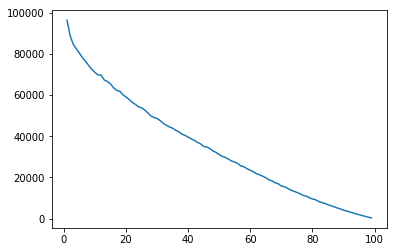

In [19]:
from sklearn.cluster import KMeans

n_clusters = np.arange(1, 100)
inertias = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scale)
    
    inertias.append(kmeans.inertia_)
    
plt.plot(n_clusters, inertias)
plt.show()

### No clear 'elbow' here, so used a trial and error method to see which would create the most meaningful clusters. Settled on 60. 

In [20]:
from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=60, n_init=20)
# kmeans.fit(data_scale)

from sklearn.externals import joblib
kmeans = joblib.load('scale_cluster_smooth60Cities.pkl')

data_scale['cluster'] = kmeans.predict(data_scale)

data_scale_ri = data_scale.reset_index()

display(data_scale.head())

,0,1,2,3,4,5,6,7,8,9,...,1179,1180,1181,1182,1183,1184,1185,1186,1187,cluster
London,0.717848,0.590590,-0.345740,-0.415059,-0.050356,0.604040,1.867310,0.757164,0.461780,1.941285,...,-1.189471,-0.604394,0.004479,-0.133643,-0.211239,-0.388159,-0.929782,-0.803558,1.048926,34
Paris,0.936484,1.139392,0.536386,0.008827,0.491232,1.426891,1.137105,1.218840,0.630695,0.679278,...,-0.810233,-0.659910,-0.244379,-0.026611,-0.274672,-0.303822,-0.554741,-0.825093,0.468369,34
Rome,-0.668944,-0.680557,-1.219120,-1.372995,-0.863465,-0.134736,0.177369,-0.221835,-0.439583,-0.050540,...,-1.640099,-0.703783,-0.086831,-0.069412,-0.278449,-0.412001,-1.104439,-1.320735,-0.593458,34
Florence,0.826900,0.381123,-0.024129,0.229829,0.354106,1.083560,1.080858,1.588774,1.364534,0.672904,...,0.086640,0.759358,0.716131,0.916056,0.259547,-0.026831,-0.921086,-1.131817,-0.037637,7
Milan,0.286749,0.312685,-0.351934,-0.517278,-0.027730,2.300057,1.074565,1.226941,1.450642,1.891560,...,-0.306545,1.256120,0.850864,1.256120,0.575290,0.127888,-0.189832,-0.588603,0.679036,7


In [21]:
# from sklearn.externals import joblib
# joblib.dump(kmeans, 'scale_cluster_smooth60Cities.pkl') 

In [22]:
cities = cities.reset_index()

cities['cluster'] = data_scale_ri['cluster']

cities = cities.set_index('index')

cities = cities.sort_values(by=['Mean_Daily_Views'], ascending=False)

cities['Highest_Daily_Views'] = data.drop(columns = ['day']).max()

for c in range(0,60):
    if(len(cities[cities['cluster']==c]) > 1):
        display(cities[cities['cluster']==c])

,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Amsterdam,5552.847643,690.581949,0.124365,5452.5,1,11224
Rotterdam,1611.997475,550.619105,0.341576,1536.0,1,14486


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Dubai,10137.389731,3418.816934,0.337248,9773.5,3,61696
Mumbai,7651.025253,2518.352045,0.329152,7411.5,3,59641
Tehran,2029.026936,549.437705,0.270789,1923.0,3,9407
Riyadh,1794.101852,542.981558,0.302648,1723.0,3,9536


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
New_York_City,16219.109428,1884.323080,0.116179,16103.0,4,41259
Cairo,2052.435185,383.782101,0.186989,2019.0,4,6790


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Florence,3004.405724,512.299897,0.170516,2961.0,7,9344
Milan,2993.249158,381.029873,0.127296,2972.5,7,8555


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Tokyo,5726.415825,801.971143,0.140048,5685.5,8,21878
Munich,3354.207071,1225.848168,0.365466,3282.0,8,36204
Athens,3090.001684,651.047375,0.210695,3018.5,8,12285


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Vienna,4182.794613,647.773574,0.154866,4066.5,9,11596
Chennai,3959.509259,1332.154240,0.336444,3725.5,9,23159
New_Delhi,3231.336700,486.546307,0.150571,3152.5,9,8113


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Jerusalem,6194.861111,11612.381219,1.874518,4779.5,10,248056
Tel_Aviv,2527.095960,1964.752575,0.777474,2254.0,10,45711


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Alexandria,2173.158249,1933.346940,0.889648,2005.0,14,43985
Havana,1860.414141,956.837345,0.514314,1585.5,14,14347


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Philadelphia,5483.137205,1594.124940,0.290732,5215.0,15,47104
Boston,5431.188552,831.664687,0.153128,5347.0,15,12341


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Prague,4724.696970,483.641412,0.102365,4702.0,17,10769
Venice,4608.391414,725.281041,0.157383,4581.5,17,16831
Avignon,732.464646,203.683472,0.278080,712.5,17,4802


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Los_Angeles,9991.960438,1030.126499,0.103096,9879.0,18,20203
Chicago,8071.278620,1343.792355,0.166491,7948.5,18,26502
Sydney,4037.165825,586.510756,0.145278,3984.0,18,7517


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Samarkand,1040.478114,377.875987,0.363175,992.5,19,9023
Bukhara,571.212121,132.459841,0.231893,552.0,19,2298


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Moscow,4232.552189,845.74729,0.199820,4085.5,20,12851
Buenos_Aires,2623.389731,503.80711,0.192044,2582.5,20,11229


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Belgrade,2099.91835,441.974965,0.210472,2017.5,21,6451
Zagreb,1475.36532,1286.756608,0.872161,1316.0,21,24678


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Edinburgh,3382.055556,473.583777,0.140028,3366.5,28,9708
Glasgow,2929.402357,410.143957,0.140009,2906.5,28,10181
Belfast,2308.835859,422.547524,0.183013,2256.5,28,7626
Riga,1474.434343,301.304708,0.204353,1446.5,28,6685


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
San_Francisco,6541.259259,955.648550,0.146096,6464.5,29,23307
Toronto,6495.120370,1073.861386,0.165334,6330.0,29,19417
Seattle,5534.480640,636.449532,0.114997,5515.5,29,9884
Vancouver,4944.519360,1073.130512,0.217034,4868.0,29,24080
Detroit,4634.079125,906.275701,0.195568,4474.5,29,17511
Bangkok,3271.851852,691.712402,0.211413,3196.5,29,16574
Dallas,3222.383838,1310.754958,0.406766,3113.0,29,40600
Stockholm,2925.936869,589.618837,0.201515,2838.5,29,13933


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Istanbul,4831.606902,2026.376170,0.419400,4478.0,32,39992
Ankara,1407.638047,1210.994674,0.860303,1188.5,32,20487


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
London,12839.788721,2919.749790,0.227399,12484.0,34,76930
Paris,7681.922559,7423.516764,0.966362,7118.0,34,175963
Rome,5309.776094,771.229493,0.145247,5255.0,34,15033
Dublin,3585.536195,582.176190,0.162368,3505.0,34,9996
Baghdad,1693.162458,607.968081,0.359073,1601.5,34,11788


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Barcelona,5375.106902,2155.229639,0.400965,5117.0,35,44502
Madrid,3198.393098,577.083369,0.180429,3130.0,35,8029


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Shanghai,4378.582492,551.974540,0.126062,4360.0,40,11890
Beijing,3976.056397,761.557246,0.191536,3897.0,40,14510
Warsaw,2291.947811,304.747693,0.132964,2265.0,40,5573


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Saint_Petersburg,4832.271886,9826.697866,2.033556,4161.0,52,327285
Kyoto,2495.936869,10735.588387,4.301226,1808.0,52,249288
Hanoi,1823.107744,3169.272225,1.738390,1613.0,52,75614


In [23]:
cityclust = pd.DataFrame()

for c in range(0,60):
    if(len(cities[cities['cluster']==c]) > 1):
        cityclust = cityclust.append(cities[cities['cluster']==c])

cityclust['cluster'] = cityclust['cluster'].replace(52,2)
cityclust['cluster'] = cityclust['cluster'].replace(40,5)
cityclust['cluster'] = cityclust['cluster'].replace(35,6)
cityclust['cluster'] = cityclust['cluster'].replace(34,11)
cityclust['cluster'] = cityclust['cluster'].replace(32,12)
cityclust['cluster'] = cityclust['cluster'].replace(29,13)
cityclust['cluster'] = cityclust['cluster'].replace(28,16)

cityclust = cityclust.sort_values(ascending=True, by='cluster')

cityclust = cityclust.reset_index()

cityclust['Position'] = cityclust.index.values

color_list = ['orangered','green','blue', 'black', 'orange', 'aqua', 'brown', 'purple', 'turquoise', 'red', 'gray', 'olive', 'navy', 'pink', 'maroon', 'darkkhaki', 'orangered','green','blue', 'black', 'orange', 'aqua', 'brown', 'purple', 'turquoise', 'red', 'gray', 'olive', 'navy']

cityclust['Color'] = 0

for i in cityclust.index.values:
    cityclust['Color'].loc[i] = color_list[cityclust['cluster'].loc[i]]

cityclust = cityclust.rename(columns = {'index':'Name'})
display(cityclust)

,Name,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views,Position,Color
0,Amsterdam,5552.847643,690.581949,0.124365,5452.5,1,11224,0,green
1,Rotterdam,1611.997475,550.619105,0.341576,1536.0,1,14486,1,green
2,Saint_Petersburg,4832.271886,9826.697866,2.033556,4161.0,2,327285,2,blue
3,Kyoto,2495.936869,10735.588387,4.301226,1808.0,2,249288,3,blue
4,Hanoi,1823.107744,3169.272225,1.738390,1613.0,2,75614,4,blue
5,Riyadh,1794.101852,542.981558,0.302648,1723.0,3,9536,5,black
6,Tehran,2029.026936,549.437705,0.270789,1923.0,3,9407,6,black
7,Dubai,10137.389731,3418.816934,0.337248,9773.5,3,61696,7,black
8,Mumbai,7651.025253,2518.352045,0.329152,7411.5,3,59641,8,black
9,New_York_City,16219.109428,1884.323080,0.116179,16103.0,4,41259,9,orange


In [24]:
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.plotting import figure, show, output_notebook
from bokeh.resources import CDN
from bokeh.embed import file_html

output_notebook()

source = bpl.ColumnDataSource.from_df(cityclust)

hover = bmo.HoverTool(
    tooltips=[
        ('Name', '@Name'),
        ("Mean Daily Views", '@Mean_Daily_Views{int}'),
        ("Median Daily Views", '@Median{int}'),
        ("Standard Deviation", '@Standard_Deviation{int}'),
        ("Highest Daily Views", '@Highest_Daily_Views{int}')
    ]
)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,tap,save,box_select,"

p = figure(tools=[TOOLS,hover],plot_width=900, plot_height=1400)

p.scatter('cluster', 'Position', radius = 0.2, fill_color = 'Color', source=source)

# html = file_html(p, CDN, "CityCluster")

# Html_file= open("CityClustering.html","w")
# Html_file.write(html)
# Html_file.close()
show(p)

Loading BokehJS ...